# COMPARISON OF THE DELAYS BETWEEN MBO ENTRY POINT AND MBP ENTRY POINT FOR TWO ALTERNATIVE RTL DESIGNS
## Description of the data and experiment
Below we compare distribution of two delay series (`delay_1` and `delay_2`) conditional on order types (A' E' or D) and/or on being a TOB (Top-Of-the-Book) order:

- `delay_1` data is obtained from the log files `bb_200914_0.log` and `mbpu_200914_0_Corrected.log`.

- `delay_2` data is obtained from the log files `bb_200917_2.log` and `mbpu_200917_2.log`.

For every MBO order, in addition to the `delay_i` scores, we have `order_id`, `type` and `is_tob` variables. 

## Results
Below we compute the relevant statistics and display basic descriptive plots to compare `delay_1` to `delay_2` conditional on `type` and `is_tob` variables:

In [1]:
import sys
print(sys.version)

3.8.5 (default, Jul 20 2020, 19:48:14) 
[GCC 7.5.0]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [3]:
alt_1 = pd.read_csv("./out/alt_1.csv",names=['id', 'type','is_tob','delay_1'])
alt_2 = pd.read_csv("./out/alt_2.csv",names=['id2', 'type2','is_tob2','delay_2'])
all = pd.concat([alt_1, alt_2[['delay_2']]],ignore_index=True, axis = 1)
all.columns = alt_1.columns.to_list()   + alt_2.columns.to_list()[-1:] 
print("HEAD OF THE COMBINED CSV FILE:\n")
print(tabulate(all.head(10), headers=all.columns))

HEAD OF THE COMBINED CSV FILE:

            id    type    is_tob    delay_1    delay_2
--  ----------  ------  --------  ---------  ---------
 0  7.1624e+18       0         1          2          2
 1  7.1624e+18       0         0          2          2
 2  7.1624e+18       0         0          2          2
 3  7.1624e+18       0         0          2          2
 4  7.1624e+18       0         0          2          2
 5  7.1624e+18       0         0          2          2
 6  7.1624e+18       0         0          2          2
 7  7.1624e+18       0         0          2          2
 8  7.1624e+18       0         0          2          2
 9  7.1624e+18       0         0          2          2


In [4]:
all = pd.concat([alt_1, alt_2[['delay_2']]],ignore_index=True, axis = 1)
all.columns = alt_1.columns.to_list()   + alt_2.columns.to_list()[-1:] 
desc_all = all.describe()
print("GENERAL DESCRIPTION OF DATA:\n")
print(tabulate(desc_all, headers = desc_all.columns ))

GENERAL DESCRIPTION OF DATA:

                     id          type         is_tob       delay_1       delay_2
-----  ----------------  ------------  -------------  ------------  ------------
count  242977            242977        242977         242977        242977
mean        7.16278e+18       1.22324       0.322002       7.78797      12.2614
std         4.91715e+14       1.3508        0.467245       5.57411       5.97261
min         7.11491e+18       0             0              2             2
25%         7.16279e+18       0             0              2            13
50%         7.16279e+18       1             0             13            15
75%         7.16279e+18       3             1             13            15
max         7.16279e+18       3             1            162            86


In [5]:
def plot_box(df):
    desc = df.describe()
    print(tabulate(desc, headers = desc.columns))
    sns.boxplot( data=df[["delay_1", "delay_2"]])
    return plt
a4_dims = (8, 6)

GENERAL DESCRIPTION OF ADD ORDER CASES:

                     id    type         is_tob    delay_1       delay_2
-----  ----------------  ------  -------------  ---------  ------------
count  115657            115657  115657            115657  115657
mean        7.16277e+18       0       0.25311           2       9.49459
std         6.97741e+14       0       0.434796          0       6.985
min         7.11491e+18       0       0                 2       2
25%         7.16279e+18       0       0                 2       2
50%         7.16279e+18       0       0                 2      14
75%         7.16279e+18       0       1                 2      15
max         7.16279e+18       0       1                 2      30


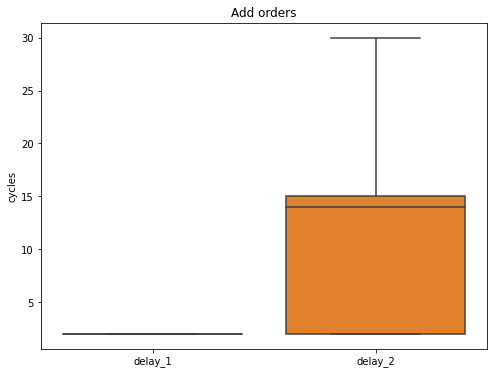

In [6]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Add orders')
plt.ylabel('cycles')
print("GENERAL DESCRIPTION OF ADD ORDER CASES:\n")
plot_box(all.query('type==0')).show()

GENERAL DESCRIPTION OF EXECUTE ORDER CASES:

                    id    type    is_tob      delay_1      delay_2
-----  ---------------  ------  --------  -----------  -----------
count  42370             42370     42370  42370        42370
mean       7.16279e+18       1         1     13.1283      13.1276
std        1.98364e+14       0         0      1.60052      1.58575
min        7.12598e+18       1         1     13           13
25%        7.16279e+18       1         1     13           13
50%        7.16279e+18       1         1     13           13
75%        7.16279e+18       1         1     13           13
max        7.16279e+18       1         1     86           86


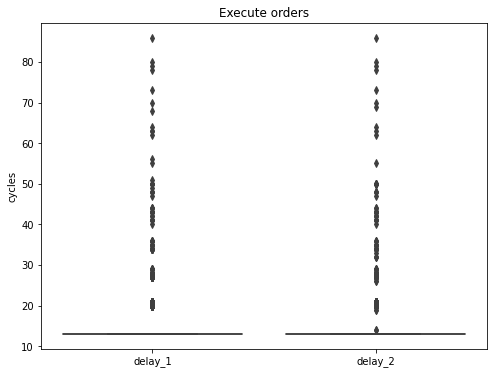

In [7]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Execute orders')
plt.ylabel('cycles')
print("GENERAL DESCRIPTION OF EXECUTE ORDER CASES:\n")
plot_box(all.query('type==1')).show()

GENERAL DESCRIPTION OF DELETE ORDER CASES:

                    id    type         is_tob       delay_1     delay_2
-----  ---------------  ------  -------------  ------------  ----------
count  84950             84950  84950          84950         84950
mean       7.16279e+18       3      0.0776339     13.0046       15.5963
std        9.40531e+13       0      0.267596       0.737906      3.5259
min        7.15331e+18       3      0             13            14
25%        7.16279e+18       3      0             13            15
50%        7.16279e+18       3      0             13            15
75%        7.16279e+18       3      0             13            15
max        7.16279e+18       3      1            162            44


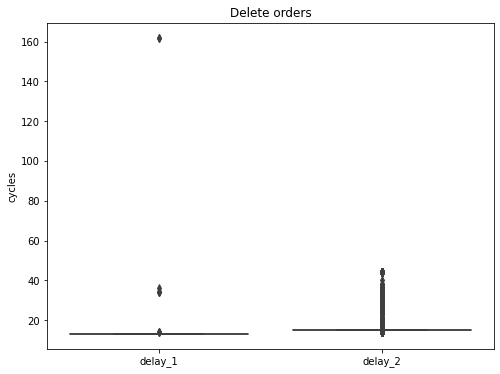

In [8]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Delete orders')
plt.ylabel('cycles')
print("GENERAL DESCRIPTION OF DELETE ORDER CASES:\n")
plot_box(all.query('type==3')).show()

GENERAL DESCRIPTION OF ORDERS THAT HIT AT TOB:

                    id          type    is_tob      delay_1      delay_2
-----  ---------------  ------------  --------  -----------  -----------
count  78239            78239            78239  78239        78239
mean       7.16279e+18      0.794425         1      8.95373      9.5883
std        1.46132e+14      0.817973         0      5.50434      5.58574
min        7.12598e+18      0                1      2            2
25%        7.16279e+18      0                1      2            2
50%        7.16279e+18      1                1     13           13
75%        7.16279e+18      1                1     13           13
max        7.16279e+18      3                1     86           86


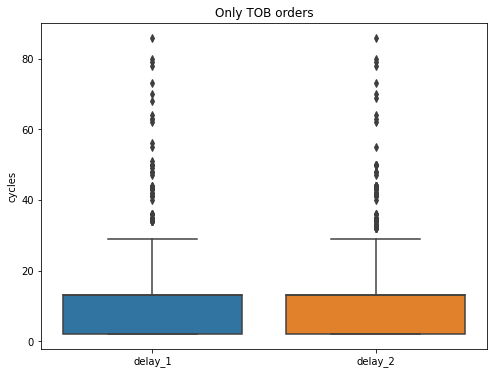

In [9]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Only TOB orders')
plt.ylabel('cycles')
print("GENERAL DESCRIPTION OF ORDERS THAT HIT AT TOB:\n")
plot_box(all.query('is_tob==1')).show()

GENERAL DESCRIPTION OF ADD ORDERS THAT HIT AT TOB:

                    id    type    is_tob    delay_1      delay_2
-----  ---------------  ------  --------  ---------  -----------
count  29274             29274     29274      29274  29274
mean       7.16279e+18       0         1          2      3.25391
std        7.67156e+12       0         0          0      3.79527
min        7.1624e+18        0         1          2      2
25%        7.16279e+18       0         1          2      2
50%        7.16279e+18       0         1          2      2
75%        7.16279e+18       0         1          2      2
max        7.16279e+18       0         1          2     28


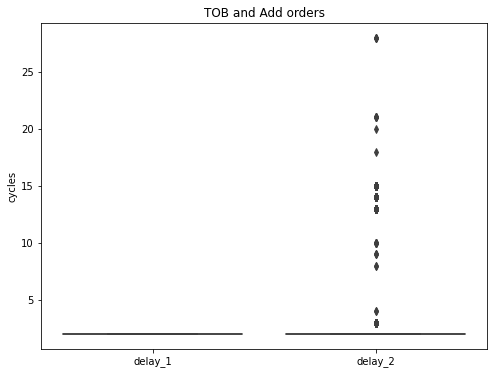

In [10]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('TOB and Add orders')
plt.ylabel('cycles')
print("GENERAL DESCRIPTION OF ADD ORDERS THAT HIT AT TOB:\n")
plot_box(all.query('type==0 and is_tob==1')).show()

GENERAL DESCRIPTION OF EXECUTE ORDERS THAT HIT AT TOB:

                    id    type    is_tob      delay_1      delay_2
-----  ---------------  ------  --------  -----------  -----------
count  42370             42370     42370  42370        42370
mean       7.16279e+18       1         1     13.1283      13.1276
std        1.98364e+14       0         0      1.60052      1.58575
min        7.12598e+18       1         1     13           13
25%        7.16279e+18       1         1     13           13
50%        7.16279e+18       1         1     13           13
75%        7.16279e+18       1         1     13           13
max        7.16279e+18       1         1     86           86


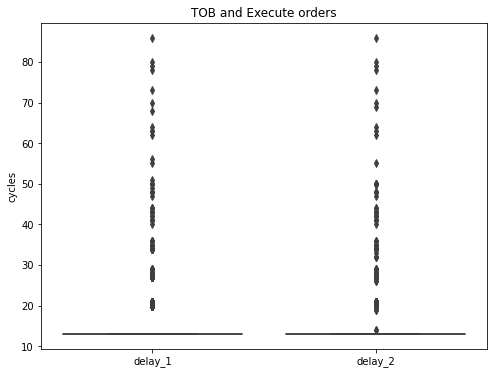

In [11]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('TOB and Execute orders')
plt.ylabel('cycles')
print("GENERAL DESCRIPTION OF EXECUTE ORDERS THAT HIT AT TOB:\n")
plot_box(all.query('type==1 and is_tob==1')).show()

GENERAL DESCRIPTION OF DELETE ORDERS THAT HIT AT TOB:

                   id    type    is_tob      delay_1     delay_2
-----  --------------  ------  --------  -----------  ----------
count  6595              6595      6595  6595         6595
mean      7.16279e+18       3         1    13.0003      14.9668
std       1.61533e+13       0         0     0.017413     1.59255
min       7.1624e+18        3         1    13           14
25%       7.16279e+18       3         1    13           15
50%       7.16279e+18       3         1    13           15
75%       7.16279e+18       3         1    13           15
max       7.16279e+18       3         1    14           44


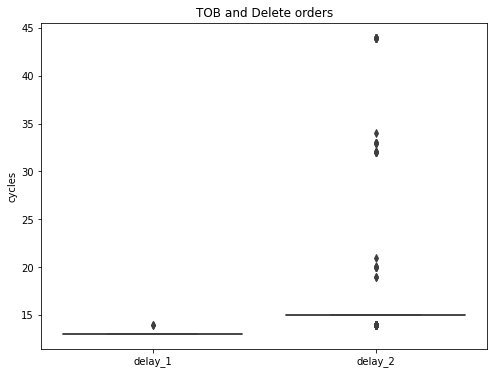

In [12]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('TOB and Delete orders')
plt.ylabel('cycles')
print("GENERAL DESCRIPTION OF DELETE ORDERS THAT HIT AT TOB:\n")
plot_box(all.query('type==3 and is_tob==1')).show()